In [1]:
from google.colab import files
uploaded = files.upload()

Saving data.zip to data.zip


In [2]:
%ls

data.zip  sample_data/


In [3]:
!unzip data.zip

Streaming output truncated to the last 5000 lines.
  inflating: data/test/happy/im154.png  
  inflating: data/test/happy/im156.png  
  inflating: data/test/happy/im157.png  
  inflating: data/test/happy/im158.png  
  inflating: data/test/happy/im159.png  
  inflating: data/test/happy/im161.png  
  inflating: data/test/happy/im162.png  
  inflating: data/test/happy/im166.png  
  inflating: data/test/happy/im167.png  
  inflating: data/test/happy/im168.png  
  inflating: data/test/happy/im170.png  
  inflating: data/test/happy/im173.png  
  inflating: data/test/happy/im176.png  
  inflating: data/test/happy/im181.png  
  inflating: data/test/happy/im182.png  
  inflating: data/test/happy/im183.png  
  inflating: data/test/happy/im184.png  
  inflating: data/test/happy/im185.png  
  inflating: data/test/happy/im186.png  
  inflating: data/test/happy/im188.png  
  inflating: data/test/happy/im190.png  
  inflating: data/test/happy/im191.png  
  inflating: data/test/happy/im193.png  
  infl

In [4]:
%ls

data/  data.zip  sample_data/


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [0]:
train_dir = 'data/train'
val_dir = 'data/test'

In [0]:
num_train=28709
num_val=7178
batch_size=64
num_epochs=50

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48,48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(48,48),
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7,activation='softmax'))



Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.0001,decay=1e-6),metrics=['accuracy'])

In [12]:
model_info = model.fit_generator(
    train_generator,
    steps_per_epoch=num_train//batch_size,
    epochs=num_epochs,
    validation_data=validation_generator,
    validation_steps=num_val//batch_size
)

Epoch 1/50
448/448 [==============================] - 19s 43ms/step - loss: 1.8026 - acc: 0.2606 - val_loss: 1.7078 - val_acc: 0.3382
Epoch 2/50
448/448 [==============================] - 12s 28ms/step - loss: 1.6225 - acc: 0.3692 - val_loss: 1.5541 - val_acc: 0.4011
Epoch 3/50
448/448 [==============================] - 12s 27ms/step - loss: 1.5159 - acc: 0.4178 - val_loss: 1.4666 - val_acc: 0.4368
Epoch 4/50
448/448 [==============================] - 12s 27ms/step - loss: 1.4431 - acc: 0.4486 - val_loss: 1.3942 - val_acc: 0.4729
Epoch 5/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3791 - acc: 0.4777 - val_loss: 1.3332 - val_acc: 0.4941
Epoch 6/50
448/448 [==============================] - 12s 27ms/step - loss: 1.3250 - acc: 0.4958 - val_loss: 1.2941 - val_acc: 0.5123
Epoch 7/50
448/448 [==============================] - 12s 28ms/step - loss: 1.2894 - acc: 0.5119 - val_loss: 1.2563 - val_acc: 0.5254
Epoch 8/50
448/448 [==============================] - 12s 27ms

In [13]:
print(model_info)

In [0]:
def plot_model_history(model_history):
  fig,ax = plt.subplots(1,2,figsize=(15,5))
  ax[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
  ax[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
  ax[0].set_title('Model Accuracy')
  ax[0].set_ylabel('Accuracy')
  ax[0].set_xlabel('Epochs')
  ax[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
  ax[0].legend(['train','validation'],loc='best')
  # summarize history for loss
  ax[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
  ax[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
  ax[1].set_title('Model Loss')
  ax[1].set_ylabel('Loss')
  ax[1].set_xlabel('Epochs')
  ax[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
  ax[1].legend(['train','validation'],loc='best')
  fig.savefig('plot.png')
  plt.show()

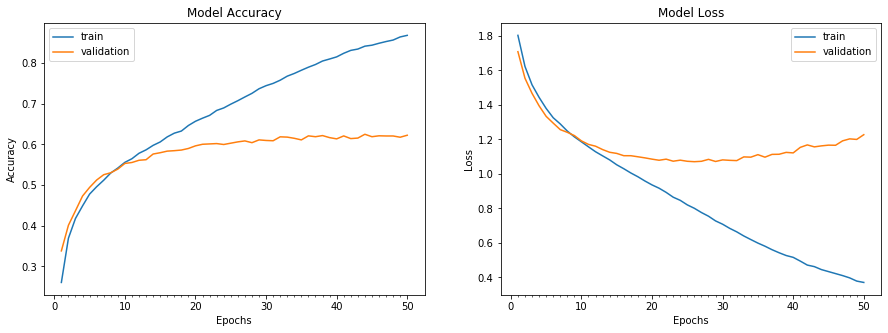

In [15]:
plot_model_history(model_info)

In [0]:
model.save_weights('model.h5')